
# 最小二乗法を使うとき When to use least squares

Assume one explanatory variable and one dependent variable, for which linear regression is planned.

１個の説明変数、１個の被説明変数があって、線形回帰を行うとき。
$$
Y \sim aX + b
$$

We want to find $a$ and $b$ that minimize 

$$
\sum_{i=1}^n (y-\hat{y})^2 = \sum_{i=1}^n (y_i-(ax_i+b))^2
$$

を最小にするような、$a,b$の値を求める。


When there are multiple explanatory variables, $a$ should be replaced by a vector $\mathbf{a}$.

複数の説明変数があって、１個の被説明変数があるときには、説明変数の数だけの係数からなるベクトル$\mathbf{a}$を用いて

$$
y \sim X \mathbf{a} + b
$$
というモデルになる。

The following should be minimized.

$$
\sum_{i=1}^n (y_i-\hat{y_i})^2 = \sum_{i=1}^n (y_i-(x_i^T a +b))^2 = ||y-(Xa+b)||^2
$$
を最小にするような$\mathbf{a},b$を求める。

# $b=0$ or $b != 0$ $b=0$の場合と、そうでない場合

## $b=0$

今、$b=0$と固定したモデルの場合には

When $b=0$, the formula is,
$$
y \sim Xa
$$

and the following should be minimized.

$$
||y-X\mathbf{a}||^2
$$
を最小にするような$\mathbf{a}$を求めることが課題である。

## $b != 0$

$b=0$でない場合には、$X$に１列足して、$X'$とする。

加えた列は、すべて値を1とする。

When $b !=0 $, add one element to $\mathbf{a}$.

また、$\mathbf{a}$にも、１つ要素を増やしてやる。

増やした$\mathbf{a}$ 成分に対応して $X$も１成分増やす。その値は、全サンプルで等しく$1$とする。

For the additional element of $\mathbf{a}$, one element should be added for $X$.
The value of $X$ for it should be $1$ for all the samples.

増やした分の推定値が$b$になる。

The estimated value for the additional $a$ is the estimate of $b$.

# How to do ? どうやるか

$$
a = (X^TX)^{-1}X^T y
$$

Believe this, and let's calculate $a$.
とにかく、計算してみる。

Read [Calculus for Least Squares](./Calculus_for_Least_Squares.ipynb) for the background of this formula.

この式の背景は[Calculus for Least Squares](./Calculus_for_Least_Squares.ipynb)


[1] -1.003798

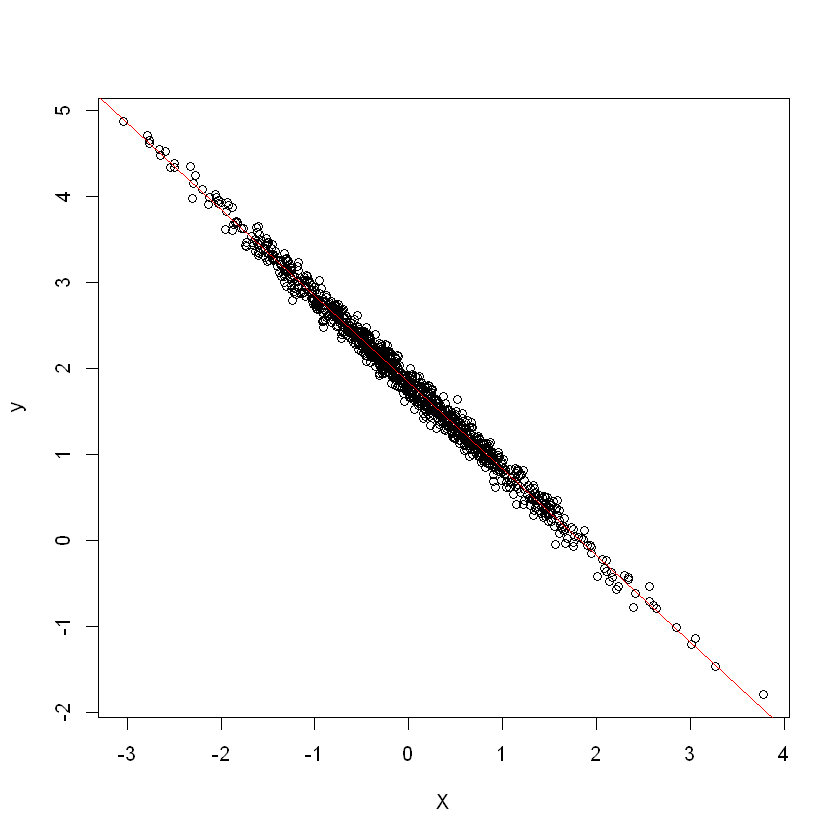

In [14]:
d <- 1
n <- 1000
X <- matrix(rnorm(d*n),ncol=d)
a <- rnorm(d)
b <- rnorm(1)
a
y <- X %*% a + b + rnorm(n)*0.1
plot(X,y)
abline(b,a,col=2)


In [15]:
X. <- cbind(X,rep(1,n))
a. <- solve(t(X.)%*%X.)%*%t(X.) %*% y
a.
print(c(a,b))


-1.005632
1.829206


[1] -1.003798  1.832579


確かにうまく行っている。

## 式を眺める

$$
a = (X^T X)^{-1} X^T y
$$
どうしてこの式でよいのか、というのは、ふつうの統計学の教科書に書いてある。

それよりは、この式の行列のサイズを確認することに時間を使ってみよう。

+ $X$は$n\times d$行列。

+ $X^T$は$d \times n$ 行列。

+ $X^TX$ は$d \times d$正方行列。

+ $(X^TX)^{-1}$も$d \times d$ 正方行列。

+ $(X^TX)^{-1}X^T$は$d\times n$ 行列。

+ $(X^TX)^{-1}X^T y$ は$d \times 1$ 行列。

求めたい$\mathbf{a}$のそれと一致している。



In [16]:
dim(X.)
dim(t(X.))
dim(t(X.)%*%X.)
dim(solve(t(X.)%*%X.))
dim(solve(t(X.)%*%X.)%*%t(X.))
dim(solve(t(X.)%*%X.)%*%t(X.)%*%y)


[1] 1000    2

[1]    2 1000

[1] 2 2

[1] 2 2

[1]    2 1000

[1] 2 1

この要素の意味合いはなんだろうか？

+ $X$は$d$個の変数の値を列ベクトルとして持つ行列。

+ $X^T$は$n$サンプルごとの変数の値を列ベクトルとして持つ行列。

+ $X^TX$ は変数のペアワイズな内積を要素とする行列。異なる二つのベクトルの内積が大きいということは、それらが近い関係にあることを意味し、内積が0に近いということは、相互に独立性が強いことを意味する。

+ $(X^TX)^{-1}$は、ペアワイズな内積の逆数のような行列。逆にしたので、相互に独立な間柄を大きくとり扱い、相互に近い関係は軽く扱おうとする行列

+ $(X^TX)^{-1}X^T$は変数を重く扱うか軽く扱うかを考慮して、各サンプルの変数値を加減しなおした値を格納した行列

+ $(X^TX)^{-1}X^T y$ は変数の軽重を考慮した上で、それが$y$の値を大きくする方に働いているか、小さい方に働いているかで重みづけをして足し合わせた値。

+ それが係数。

もし、複数の説明変数があり、相互に相関が強いとすると、変数の重みづけの際に、両者の重みを小さ目にすることになり、結果として、個々の説明変数の係数は小さ目にすることになる。

以下のプロットを見ると、説明変数の値と、重みづけを勘案しなおした値とは線形な関係にあることが解る。



In [7]:
library(mvtnorm)
d <- 3
n <- 1000
X <- rmvnorm(n,mean=rep(0,d),sigma=diag(rep(1,d)))
a <- rnorm(d)
b <- rnorm(1)
a
y <- X %*% a + b + rnorm(n)*0.1
X. <- cbind(X,rep(1,n))
a. <- solve(t(X.)%*%X.)%*%t(X.) %*% y
a.
print(c(a,b))


[1]  0.7409143 -0.8737360  0.1579967

0.7428951
-0.8736049
0.1584154
-0.5174425


[1]  0.7409143 -0.8737360  0.1579967 -0.5089490


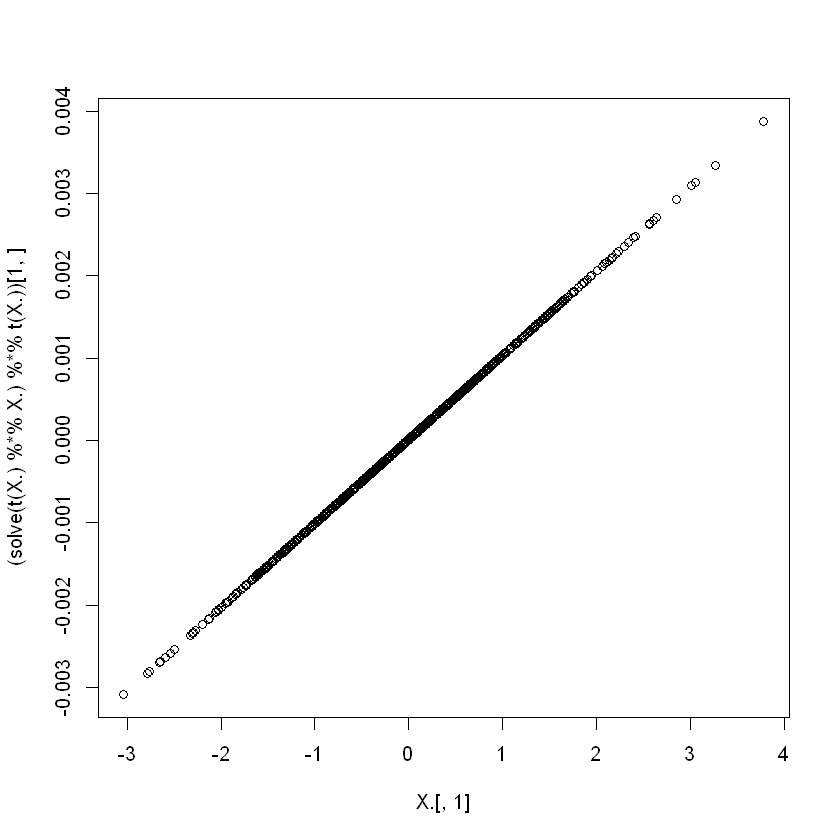

In [17]:
plot(X.[,1],(solve(t(X.)%*%X.)%*%t(X.))[1,])
#plot(X.[,2],(solve(t(X.)%*%X.)%*%t(X.))[2,])


重み勘案前と後の値の関係をプロットしてみる。

これは３つの説明変数が相互に独立な場合である。
なぜなら、行列$X$を作ったときに３変数の分散共分散行列を単位行列で与えたからである。



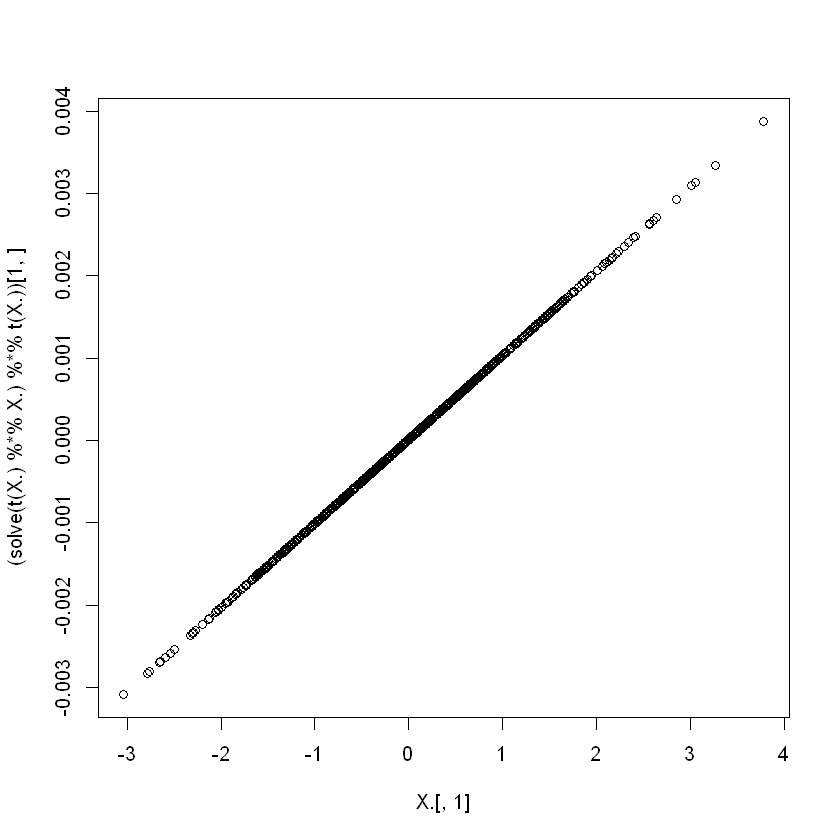

ERROR: Error in X.[, 3]:  添え字が許される範囲外です 


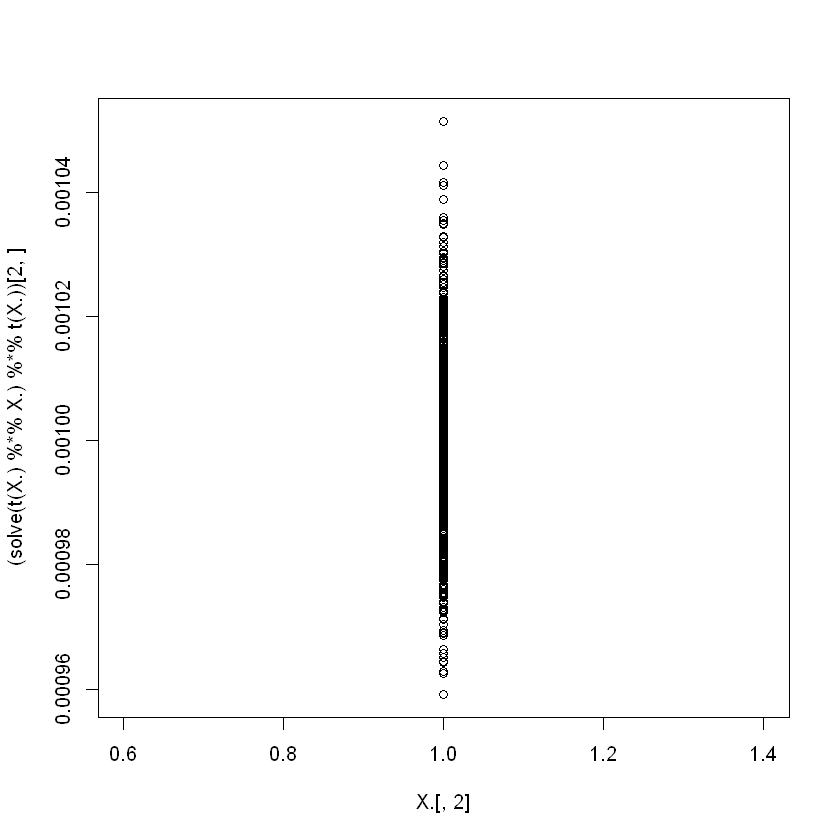

In [18]:
plot(X.[,1],(solve(t(X.)%*%X.)%*%t(X.))[1,])
plot(X.[,2],(solve(t(X.)%*%X.)%*%t(X.))[2,])
plot(X.[,3],(solve(t(X.)%*%X.)%*%t(X.))[3,])



# Exercise 1
## Exercise 1-1

説明変数３個の場合で、その３変数の分散共分散行列が単位行列でないように作成せよ。
正定値行列の作成の仕方を思い出すこと。

そのうえで、勘案前後のプロットをせよ。

各変数の間に相関が生じているので、勘案のされ方は、各サンプルの３変数の値の取り方によって差が生じるため、勘案前後の関係にばらつきが生じることを確認せよ。



[1]  1.611377  1.420246 -1.869123

1.6158214
1.4375167
-1.8746743
-0.4008104


[1]  1.6113774  1.4202455 -1.8691230 -0.4061566


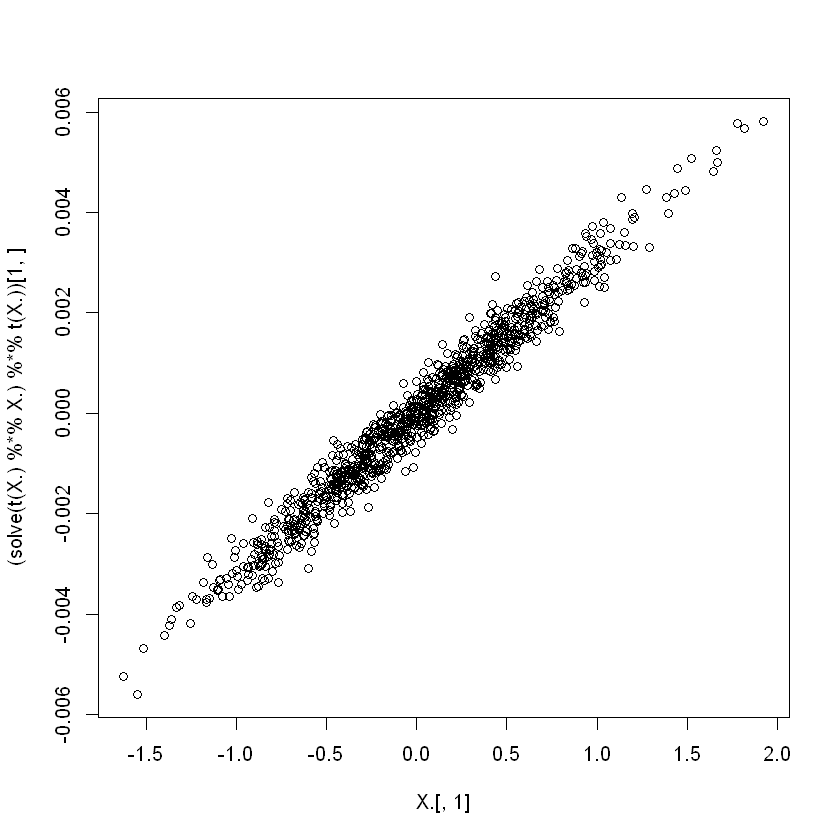

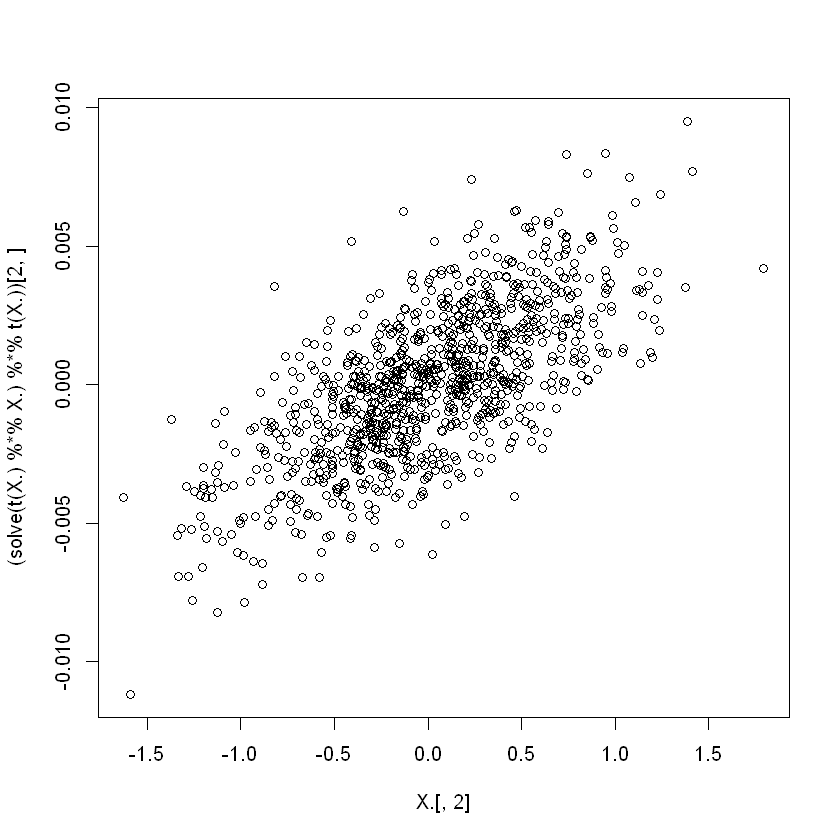

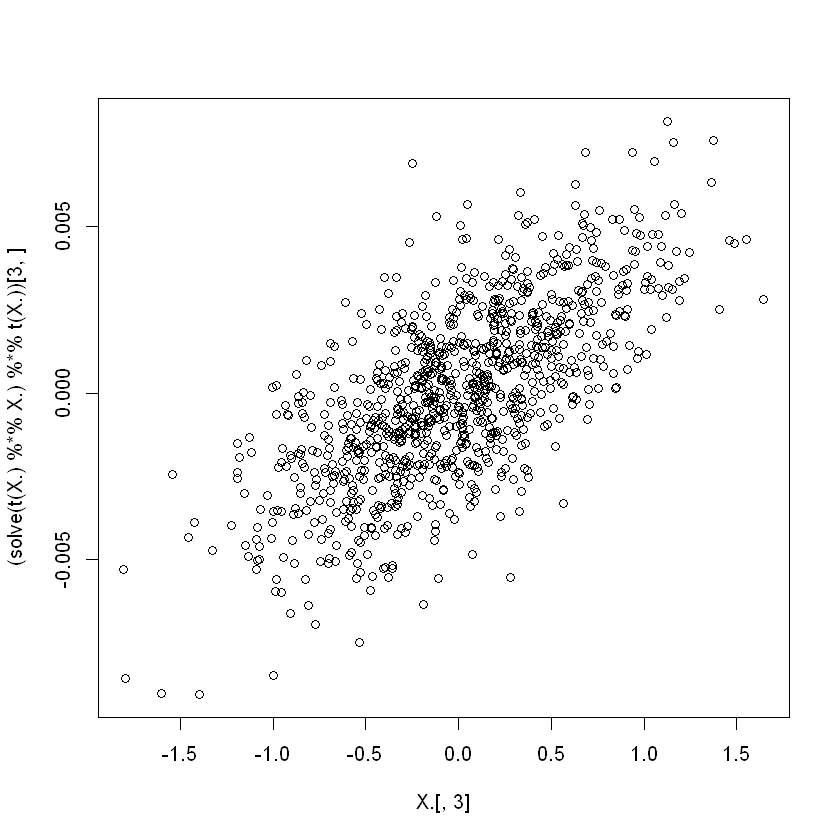

In [21]:
d <- 3
library(GPArotation)
R <- Random.Start(d)
lambdas <- runif(d)
M <- R %*% diag(lambdas) %*% t(R)
X <- rmvnorm(n,mean=rep(0,d),sigma=M)
a <- rnorm(d)
b <- rnorm(1)
a
y <- X %*% a + b + rnorm(n)*0.1
X. <- cbind(X,rep(1,n))
a. <- solve(t(X.)%*%X.)%*%t(X.) %*% y
a.
print(c(a,b))
plot(X.[,1],(solve(t(X.)%*%X.)%*%t(X.))[1,])
plot(X.[,2],(solve(t(X.)%*%X.)%*%t(X.))[2,])
plot(X.[,3],(solve(t(X.)%*%X.)%*%t(X.))[3,])



# 固有値分解とは違う分解、QR分解、特異値分解

実際に
$$
\mathbf{a} = (X^TX)^{-1}X^T
$$
をこのまま解こうとすると、$X^TX$の逆行列を計算する必要が出る。
逆行列の計算は負荷が大きく誤差が出やすいという性質もあるので、逆行列を算出せずに、$\mathbf{a}$を計算する方法がいくつか知られている。

いずれも、対角化・三角化行列を活用する方法である。

Rの線形回帰関数lm()では、デフォルトの計算方法としてQR法を取っていることが、lm()関数のソースを読むことで確認できる。

# Exercise 2

## Exercise 2-1
Rの関数は、関数名をプロンプトに書き込むことで、そのコードが読めることがある。lm()関数もそのようにしてコードが読める関数である。lm()関数のコードを表示させ、QR法がデフォルトであることを確認し、どのようにしてそれを確認したかを説明せよ。


In [20]:
lm

function (formula, data, subset, weights, na.action, method = "qr", 
    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 
    contrasts = NULL, offset, ...) 
{
    ret.x <- x
    ret.y <- y
    cl <- match.call()
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (method == "model.frame") 
        return(mf)
    else if (method != "qr") 
        warning(gettextf("method = '%s' is not supported. Using 'qr'", 
            method), domain = NA)
    mt <- attr(mf, "terms")
    y <- model.response(mf, "numeric")
    w <- as.vector(model.weights(mf))
    if (!is.null(w) && !is.numeric(w)) 
        stop("'weights' must be a numeric vector")
    offset <- as.vector(model.offset(mf))
    if (!is.null(offset)) {
        if (length(offset) != NROW(y)) 
            stop(gettextf("number of offsets is %d, should equal %d (number of observations)", 
                length(offset), NROW(y)), domain = NA)
    }
    if (is.empty.model(mt)) {
        x <- NULL
        z <- list(coefficients = if (is.matrix(y)) matrix(, 0, 
            3) else numeric(), residuals = y, fitted.values = 0 * 
            y, weights = w, rank = 0L, df.residual = if (!is.null(w)) sum(w != 
            0) else if (is.matrix(y)) nrow(y) else length(y))
        if (!is.null(offset)) {
            z$fitted.values <- offset
            z$residuals <- y - offset
        }
    }
    else {
        x <- model.matrix(mt, mf, contrasts)
        z <- if (is.null(w)) 
            lm.fit(x, y, offset = offset, singular.ok = singular.ok, 
                ...)
        else lm.wfit(x, y, w, offset = offset, singular.ok = singular.ok, 
            ...)
    }
    class(z) <- c(if (is.matrix(y)) "mlm", "lm")
    z$na.action <- attr(mf, "na.action")
    z$offset <- offset
    z$contrasts <- attr(x, "contrasts")
    z$xlevels <- .getXlevels(mt, mf)
    z$call <- cl
    z$terms <- mt
    if (model) 
        z$model <- mf
    if (ret.x) 
        z$x <- x
    if (ret.y) 
        z$y <- y
    if (!qr) 
        z$qr <- NULL
    z
}
<bytecode: 0x00000000129941f8>
<environment: namespace:stats>